# Reports Crimes in Vancouver from 2003 to Mar. 2016
---

Data collected from data.vancouver.ca. (http://data.vancouver.ca/datacatalogue/crime-data.htm)

*Jeffrey Liang*

I was curious about the reported crimes committed in my city -- Vancouver. I am not expecting any unsurprises as Canada has one of the lowest crime rates in North America. However, I am interested in what I can find. *Here we go!*

In [1]:
%matplotlib inline
import seaborn as sns
sns.set(style='white')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 8
import pandas as pd
import numpy as np

In [2]:
raw_data = pd.read_csv('crime_csv_all_years.csv')

In [3]:
raw_data.head()

,TYPE,YEAR,MONTH,HUNDRED_BLOCK,NEIGHBOURHOOD,N_HOOD,X,Y
0,Break and Enter Residential/Other,2003,8,10XX HARWOOD ST,West End,West End,490409.599379,5458362.93599
1,Mischief,2003,1,15XX E 4TH AVE,Grandview-Woodland,Grandview-Woodland,494705.888442,5457123.19273
2,Mischief,2003,9,15XX E 4TH AVE,Grandview-Woodland,Grandview-Woodland,494705.888442,5457123.19273
3,Other Theft,2003,9,2XX W PENDER ST,Central Business District,Central Business District,491958.863327,5458790.55658
4,Theft from Vehicle,2003,10,7XX W 15TH AVE,Fairview,Fairview,491189.161883,5456108.58783


In [4]:
data = raw_data.copy()

Let's get all the neighbourhoods in Vancouver.

In [5]:
print data['NEIGHBOURHOOD'].unique()

['West End' 'Grandview-Woodland' 'Central Business District' 'Fairview'
 'Hastings-Sunrise' 'Riley Park' nan 'Mount Pleasant'
 'Kensington-Cedar Cottage' 'Sunset' 'Renfrew-Collingwood' 'Kitsilano'
 'Victoria-Fraserview' 'Arbutus Ridge' 'Strathcona' 'South Cambie'
 'Marpole' 'Shaughnessy' 'West Point Grey' 'Oakridge' 'Dunbar-Southlands'
 'Killarney' 'Stanley Park' 'Kerrisdale' 'Musqueam']


### What are the most common crimes committed? 

Theft is the most common type of crime reported from 2003 to 2016. The low homicide rates correlate to the low homicide rate in Canada.

In [6]:
data['TYPE'].value_counts()

Other Theft                          151885
Theft from Vehicle                   149591
Mischief                              63455
Break and Enter Residential/Other     56949
Offence Against a Person              50079
Theft of Vehicle                      36353
Break and Enter Commercial            30190
Homicide                                199
Name: TYPE, dtype: int64

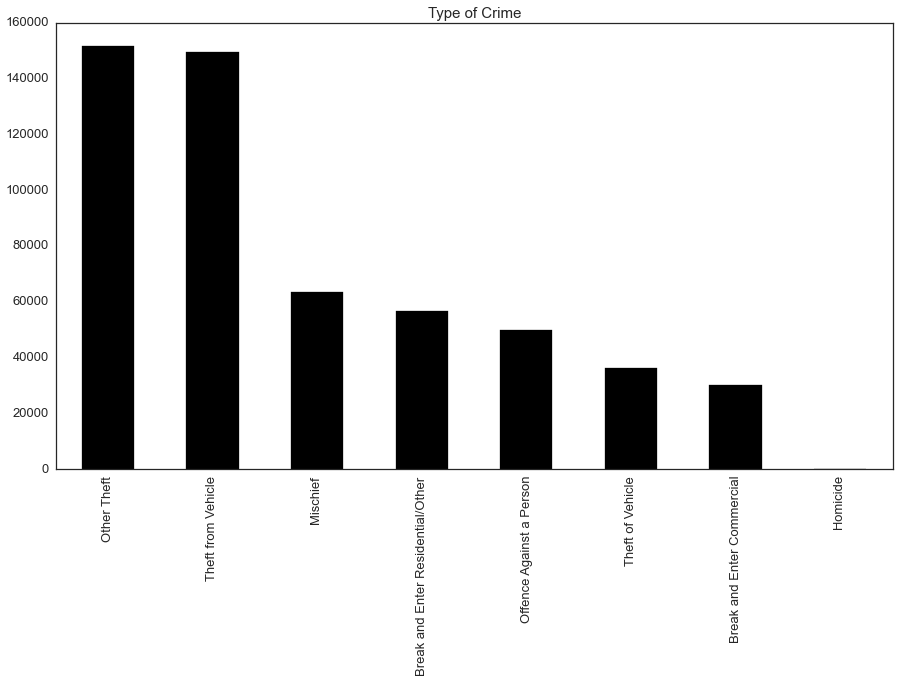

In [7]:
data['TYPE'].value_counts().plot(kind='bar', color='k', fontsize=13)
plt.title('Type of Crime', fontsize=15);

### Which months have the most reported crimes? 
August has the most crimes and December has the fewest.

In [8]:
data['MONTH'].value_counts()

8     48031
1     46988
3     46793
7     46261
10    46088
5     45222
6     45196
9     45195
11    42977
4     42310
2     42291
12    41349
Name: MONTH, dtype: int64

### Is the crime rate going down?

Looks like the the crimes reported is slightly dcreasing from 2003 to 2010 then increasing afterwards. However, we have incomplete data from 2016. But we may see it decline again in 2016.

In [9]:
data['YEAR'].value_counts().sort_index()

2003    55144
2004    54459
2005    49670
2006    46737
2007    41998
2008    39171
2009    35584
2010    33352
2011    31953
2012    33122
2013    33502
2014    36612
2015    37528
2016     9869
Name: YEAR, dtype: int64

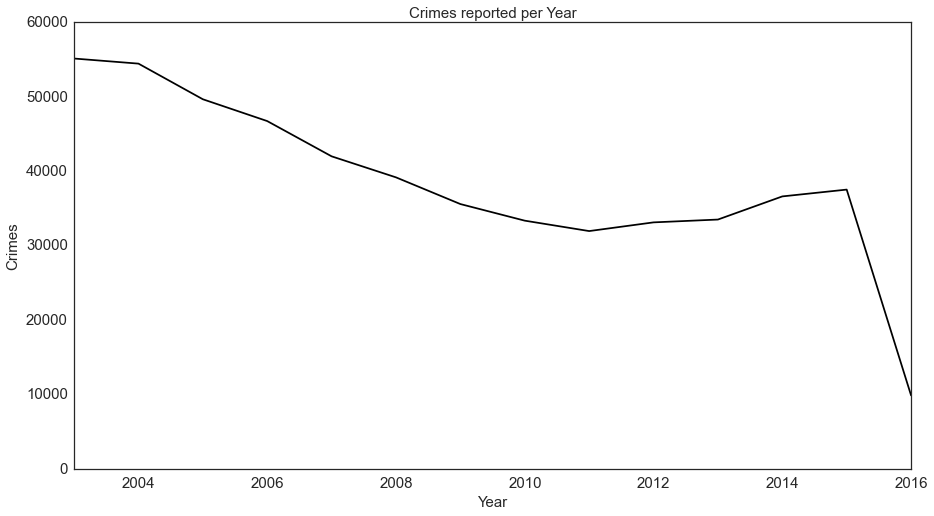

In [10]:
years = data['YEAR'].value_counts()
years.sort_index().plot(color='k', fontsize=15)
plt.title('Crimes reported per Year', fontsize=15)
plt.ylabel('Crimes', fontsize=15)
plt.xlabel('Year', fontsize=15);

### Which neighbourhood has the most reported crimes? 
Downtown Vancouver has the most reported crimes. However, this the total and not per residence.

In [11]:
data['NEIGHBOURHOOD'].value_counts()

Central Business District    120039
West End                      44821
Fairview                      34098
Mount Pleasant                30120
Grandview-Woodland            27827
Kitsilano                     27101
Renfrew-Collingwood           25454
Kensington-Cedar Cottage      24422
Strathcona                    22326
Hastings-Sunrise              17481
Sunset                        16961
Marpole                       12450
Riley Park                    12365
Victoria-Fraserview           10377
Killarney                     10104
Oakridge                       7999
Dunbar-Southlands              7507
Kerrisdale                     6531
Arbutus Ridge                  5985
West Point Grey                5857
South Cambie                   5263
Shaughnessy                    4928
Stanley Park                   3752
Musqueam                       1200
Name: NEIGHBOURHOOD, dtype: int64

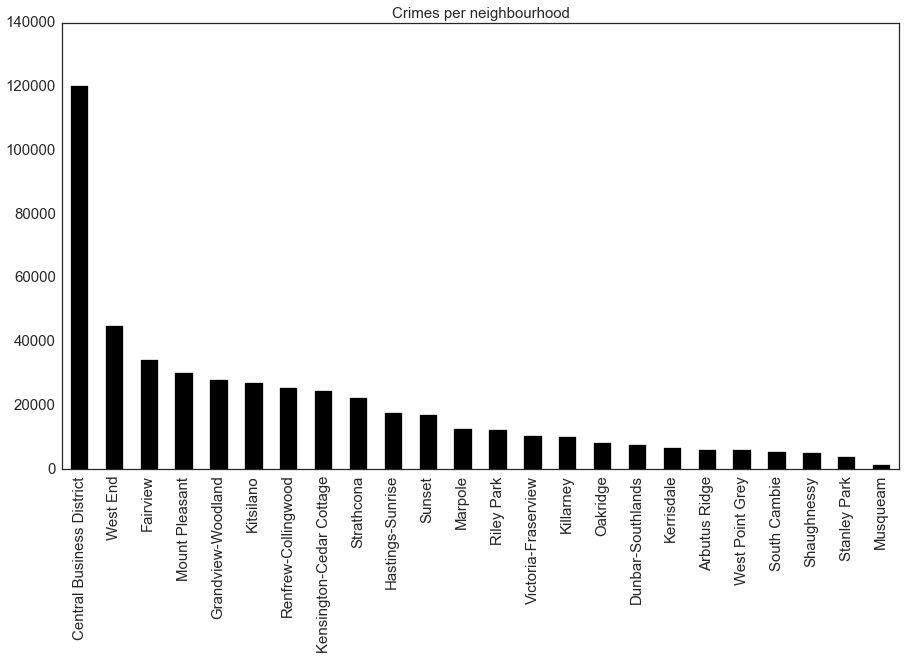

In [12]:
data['NEIGHBOURHOOD'].value_counts().plot(kind='bar', color='k', fontsize=15);
plt.title('Crimes per neighbourhood', fontsize=15);

The 700 Block of Granville St. has the most reported crimes. This is one of the busiest streets in Vancouver. 

In [13]:
data['HUNDRED_BLOCK'].value_counts()[:15]

OFFSET TO PROTECT PRIVACY    50278
7XX GRANVILLE ST              3969
X NK_LOC ST                   3451
6XX GRANVILLE ST              2685
7XX W GEORGIA ST              2572
11XX ROBSON ST                1906
6XX W 41ST AVE                1905
9XX GRANVILLE ST              1893
10XX BURRARD ST               1660
3XX W GEORGIA ST              1610
17XX E BROADWAY AVE           1605
31XX GRANDVIEW HWY            1493
5XX RICHARDS ST               1335
1XX WATER ST                  1299
3XX E BROADWAY AVE            1285
Name: HUNDRED_BLOCK, dtype: int64

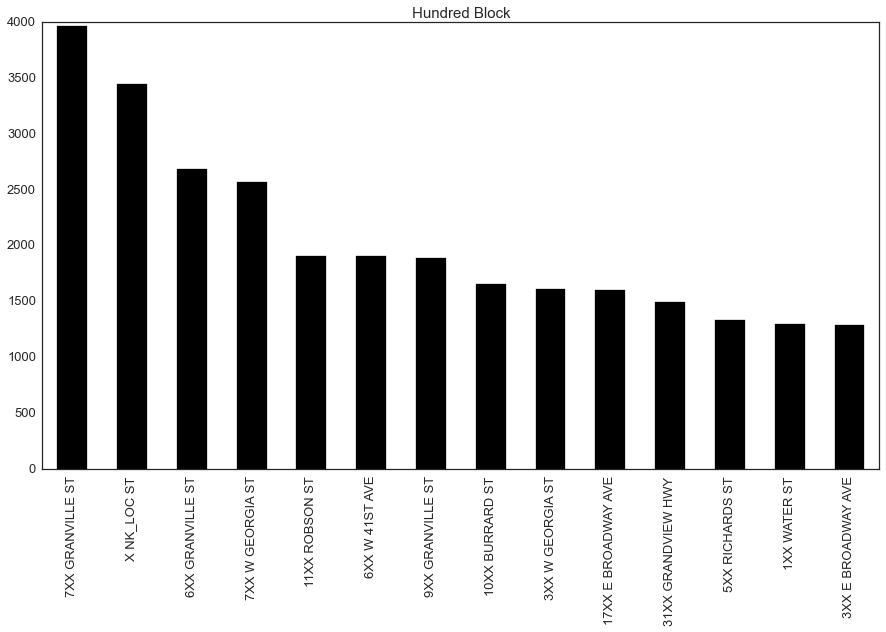

In [14]:
data['HUNDRED_BLOCK'].value_counts()[1:15].plot(kind='bar', color='k', fontsize=13)
plt.title('Hundred Block', fontsize=15);

### What is the most common reported crime in each neighbourhood?

Most crimes reported are 'Other Theft.' However, in Shaughnessy, 'Break and Enter Residential/Other' is the most frequent. Shaughnessy is home to the highest land valuations in Vancouver.

In [15]:
def per_neighbourhood():
    print '{:40} {:40} {}'.format('Neighbourhood', 'Crime', 'Total')
    print '-' * 87
    for hood in data['NEIGHBOURHOOD'].unique():
        try:
            print '{:40} {:40} {:>5}'.format(hood, data['TYPE'][data['NEIGHBOURHOOD'] == hood].value_counts().index[0],
                                       data['TYPE'][data['NEIGHBOURHOOD'] == hood].value_counts()[0])
        except IndexError:
            pass

per_neighbourhood()

Neighbourhood                            Crime                                    Total
---------------------------------------------------------------------------------------
West End                                 Other Theft                              17156
Grandview-Woodland                       Other Theft                               7723
Central Business District                Other Theft                              50109
Fairview                                 Other Theft                              12359
Hastings-Sunrise                         Theft from Vehicle                        5060
Riley Park                               Theft from Vehicle                        3749
Mount Pleasant                           Other Theft                              10054
Kensington-Cedar Cottage                 Theft from Vehicle                        6784
Sunset                                   Theft from Vehicle                        4832
Renfrew-Collingwood             

---
Crime in Vancouver has been decreasing from 2003 to 2010. However, crime has slowly increased after 2010. In general, theft is the most frequent type of crime in all neighbourhoods of Vancouver except Shaughnessy. August has the most reported crimes and December has the fewests. Throughout this notebook, I had an emphasis on 'reported crime' as this data does not represent all crimes committed. 